# ¿Qué es una ligadura?

[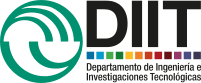](https://ingenieria.unlam.edu.ar/)  
[by-nc-sa_80x15.png](https://creativecommons.org/licenses/by-sa/4.0/deed.es_ES) 
2023 [Mariano Real](mailto:mreal@unlam.edu.ar)

---

En muchos problemas mecánicos y físicos tendremos condiciones que relacionan diferentes compoenentes de nuestro sistema que suelen denominarse __ligaduras__ o vínculos.

Para entenderlas mejor pensemos en el problema de la siguiente figura

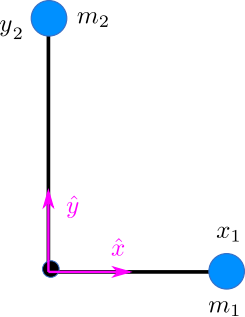

Tenemos dos masas sobre una mesa (peso y normales no entran en juego), vinculadas por una cuerda ideal (inextensible, sin masa) que se dobla por una polea ideal, esto es, simplemente la "tuerce". La cuerda tiene una longitud total $\ell$.

Si tiramos de $m_1$ hacia la derecha, entonces $m_2$ deberá moverse hacia abajo, con la misma velocidad y aceleración que adquiera $m_1$.

Esto que decimos en palabras lo podemos escribir diciendo que la coordenada de $m_1$ ($x_1$) y la coordenada de $m_2$ ($y_2$) tienen que igualar la longitud de la cuerda:

$$
x_1 + y_2 = \ell   \tag{1}
$$   

podríamos luego derivar respecto al tiempo esta ecuación para obtener relaciones para las velocidades y aceleraciones (como la longitud es constante su derivada temporal es cero):
\begin{align}
\dot{x}_1 + \dot{y}_2 &= 0 \\
\ddot{x}_1 + \ddot{y}_2 &= 0
\end{align}


Entonces, si resolviésemos este ejerccio manualmente usaríamos las ecuaciones anteriores para reemplazar en las ecuaciones de Newton del problema la relación que obtuvimos entre las aceleraciones.

Como lo que buscamos ahora es utilizar el poder de la computadora y del formalismo de Euler-Lagrange entonces tenemos que escribir el vínculo, la eq. (1), de una forma que lo podamos incluir en el lenguaje de la pc y Euler-Lagrange. 

Siempre vamos a tener que hacerlo poniendo las ecuaciones en la forma $f(z_1,z_2,z_3,...) = 0 $, esto es, una ecuación (función $f$) igualada a CERO (homogénea). Los $z_i$ serán las diferentes coordenadas a vincular, en este caso $x_1,y_2$, por lo tanto el equivalente de la ecuación (1) nos queda:

$$
f(x_1,y_2) = x_1 + y_2 -\ell = 0
$$


El resto es como se muestra en el ejercicio de ejemplo de la máquina de Atwood. Allí encontrarán un desarrollo completo de cómo utilizar luego las ecuaciones de ligadura. En el caso que estamos mirando aquí quedaría:

In [2]:
import sympy as sym # importamos funciones de cálculo simbólico
from sympy.physics import mechanics as mech # de sympy utilizaremos funciones de mecánica
from sympy.matrices import Matrix, eye, zeros, ones, diag, GramSchmidt # de sympy importo funciones de matrices
mech.init_vprinting() # notación con punto para la velocidad y punto punto para la aceleración
import warnings
warnings.filterwarnings("ignore")

In [3]:
m1, m2, l = sym.symbols('m_1, m_2, \ell', positive=True) # parámetros del sistema
e = mech.ReferenceFrame('e') # sistema de referencia en coordenadas cartesianas
x1, y2 = mech.dynamicsymbols('x_1, y_2')

In [4]:
# ligadura:
f1 = sym.Eq(x1 + y2 - l, 0 ) # ligadura como función homogénea
f1